## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap NULL scan (sneaky)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/USER/notebooks/pcaps/nmap_null_scan_sneaky'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [3]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

2197    16484.121482
Name: time, dtype: float64

In [4]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [5]:
scan_times
#duration_list

0    16484.121482
1    16484.149457
2    16484.188657
3    16484.073190
4    16484.050541
5    16484.229506
6    16484.076691
7    16484.073912
8    16484.255305
9    16484.280484
Name: Scan times, dtype: float64

In [6]:
temp = pd.DataFrame(duration_list)

In [7]:
temp.mean()

0    16484.149922
dtype: float64

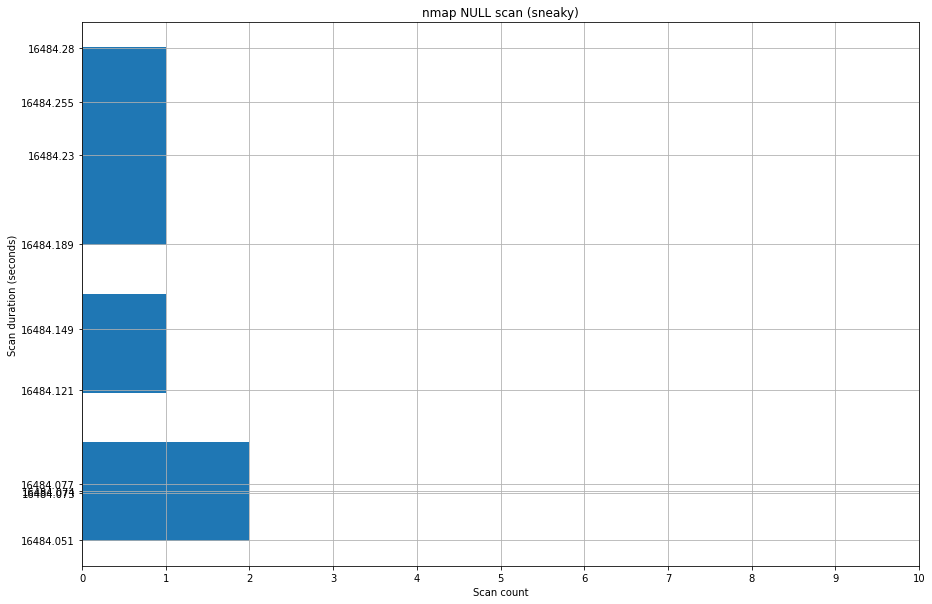

In [8]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [9]:
temp.describe()

,0
count,10.000000
mean,16484.149922
std,0.084129
min,16484.050541
25%,16484.074607
50%,16484.135469
75%,16484.219294
max,16484.280484


## Packet count

In [10]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [11]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 21980
Overall sent packets to scanner: 10990
Overall received packets from scanner: 10990


## Packets pr. second

In [12]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1.3334020925162557



## Order of ports scanned


In [13]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 49961 1720
2 49961 80
3 49961 1025
4 49961 53
5 49961 256
6 49961 111
7 49961 1723
8 49961 995
9 49961 25
10 49961 135
11 49966 1720
12 49961 199
13 49961 3389
14 49961 21
15 49961 5900
16 49961 554
17 49961 22
18 49961 443
19 49961 993
20 49961 143
21 49961 139
22 49968 1720
23 49961 3306
24 49961 8888
25 49961 23
26 49961 587
27 49961 8080
28 49961 110
29 49961 445
30 49961 113
31 49961 3918
32 49961 40911
33 49970 1720
34 49961 2068
35 49961 8222
36 49961 8254
37 49961 64623
38 49961 5102
39 49961 3367
40 49961 27353
41 49961 2301
42 49961 5907
43 49961 2170
44 49972 1720
45 49961 5432
46 49961 30718
47 49961 6667
48 49961 3
49 49961 8083
50 49961 11111
51 49961 40193
52 49961 5221
53 49961 1074
54 49961 711
55 49974 1720
56 49961 1805
57 49961 32772
58 49961 32784
59 49961 1038
60 49961 52822
61 49961 9010
62 49961 888
63 49961 9900
64 49961 5001
65 49961 2601
66 49976 1720
67 49961 9002
68 49961 4
69 49961 1218
70 49961 56738
71 49961 32781
72 49961 1105
73 49961 3995
74 49961 9

607 49961 4006
608 49961 2602
609 49961 1461
610 49961 311
611 49961 65129
612 49961 668
613 49961 1594
614 49961 5101
615 49961 2701
616 50076 1720
617 49961 1045
618 49961 2099
619 49961 1126
620 49961 306
621 49961 70
622 49961 2107
623 49961 125
624 49961 873
625 49961 4111
626 49961 1583
627 50078 1720
628 49961 3889
629 49961 5120
630 49961 3517
631 49961 7435
632 49961 50006
633 49961 9009
634 49961 7004
635 49961 1352
636 49961 1641
637 49961 2811
638 50080 1720
639 49961 81
640 49961 11110
641 49961 6969
642 49961 1083
643 49961 1027
644 49961 15003
645 49961 9103
646 49961 1761
647 49961 54045
648 49961 84
649 50082 1720
650 49961 2717
651 49961 6543
652 49961 1070
653 49961 3372
654 49961 2100
655 49961 44176
656 49961 57294
657 49961 10002
658 49961 14000
659 49961 1216
660 50084 1720
661 49961 9618
662 49961 1090
663 49961 2196
664 49961 50636
665 49961 8193
666 49961 1021
667 49961 4004
668 49961 513
669 49961 5054
670 49961 616
671 50086 1720
672 49961 16018
673 49961 68

524 53865 2602
525 53865 3871
526 53865 1145
527 53865 9090
528 53964 5900
529 53865 7512
530 53865 44442
531 53865 1087
532 53865 6667
533 53865 10778
534 53865 2200
535 53865 700
536 53865 8180
537 53865 9
538 53865 1839
539 53966 5900
540 53865 2047
541 53865 1110
542 53865 6106
543 53865 4550
544 53865 5877
545 53865 545
546 53865 2042
547 53865 8089
548 53865 10010
549 53865 9900
550 53968 5900
551 53865 19
552 53865 31038
553 53865 1138
554 53865 7007
555 53865 1147
556 53865 11111
557 53865 911
558 53865 1233
559 53865 1141
560 53865 82
561 53970 5900
562 53865 6699
563 53865 1108
564 53865 6004
565 53865 6025
566 53865 8222
567 53865 8194
568 53865 50006
569 53865 2701
570 53865 3268
571 53865 10617
572 53972 5900
573 53865 500
574 53865 1053
575 53865 16016
576 53865 1163
577 53865 1026
578 53865 84
579 53865 1001
580 53865 512
581 53865 1079
582 53865 9002
583 53974 5900
584 53865 15003
585 53865 2022
586 53865 1782
587 53865 56737
588 53865 1443
589 53865 19315
590 53865 825

59 52636 31337
60 52636 3370
61 52636 44443
62 52636 9943
63 52636 1310
64 52636 2048
65 52636 12174
66 52651 80
67 52636 512
68 52636 9080
69 52636 6646
70 52636 2604
71 52636 1840
72 52636 17
73 52636 6156
74 52636 7100
75 52636 1028
76 52636 146
77 52653 80
78 52636 444
79 52636 7070
80 52636 7443
81 52636 6669
82 52636 4045
83 52636 1026
84 52636 4
85 52636 7
86 52636 6565
87 52636 8701
88 52655 80
89 52636 8300
90 52636 20221
91 52636 2009
92 52636 425
93 52636 1148
94 52636 1056
95 52636 1761
96 52636 1110
97 52636 50000
98 52636 7921
99 52657 80
100 52636 5915
101 52636 3880
102 52636 2809
103 52636 3261
104 52636 79
105 52636 4343
106 52636 12265
107 52636 5000
108 52636 3007
109 52636 8254
110 52659 80
111 52636 2046
112 52636 2006
113 52636 14000
114 52636 5060
115 52636 3333
116 52636 8022
117 52636 15660
118 52636 26214
119 52636 1688
120 52636 9101
121 52661 80
122 52636 8651
123 52636 7200
124 52636 1085
125 52636 8001
126 52636 1061
127 52636 49160
128 52636 32772
129 52

758 52636 8010
759 52777 80
760 52636 1183
761 52636 10082
762 52636 49176
763 52636 3283
764 52636 2119
765 52636 880
766 52636 464
767 52636 9500
768 52636 55600
769 52636 2382
770 52779 80
771 52636 1033
772 52636 10215
773 52636 2301
774 52636 6668
775 52636 49163
776 52636 2190
777 52636 5500
778 52636 49175
779 52636 9220
780 52636 1048
781 52781 80
782 52636 9535
783 52636 3052
784 52636 1093
785 52636 3766
786 52636 1092
787 52636 3809
788 52636 1164
789 52636 50500
790 52636 43
791 52636 7920
792 52783 80
793 52636 1035
794 52636 3851
795 52636 10000
796 52636 11111
797 52636 11110
798 52636 3371
799 52636 1059
800 52636 7103
801 52636 2811
802 52636 7106
803 52785 80
804 52636 1199
805 52636 2041
806 52636 83
807 52636 6881
808 52636 5510
809 52636 6779
810 52636 3000
811 52636 3905
812 52636 987
813 52636 3260
814 52787 80
815 52636 10004
816 52636 8600
817 52636 8994
818 52636 3784
819 52636 1114
820 52636 911
821 52636 1094
822 52636 2179
823 52636 50001
824 52636 5907
825

325 46671 555
326 46671 1080
327 46671 10629
328 46671 1309
329 46671 5405
330 46734 199
331 46671 1074
332 46671 49152
333 46671 9010
334 46671 12345
335 46671 32784
336 46671 2045
337 46671 9503
338 46671 1183
339 46671 6059
340 46671 10566
341 46736 199
342 46671 2607
343 46671 84
344 46671 64623
345 46671 70
346 46671 3493
347 46671 1121
348 46671 1187
349 46671 800
350 46671 27355
351 46671 9090
352 46738 199
353 46671 648
354 46671 5431
355 46671 2119
356 46671 8222
357 46671 888
358 46671 3889
359 46671 2811
360 46671 2196
361 46671 5030
362 46671 19101
363 46740 199
364 46671 4125
365 46671 9002
366 46671 7625
367 46671 7937
368 46671 1059
369 46671 3077
370 46671 2001
371 46671 3517
372 46671 49153
373 46671 1524
374 46742 199
375 46671 32781
376 46671 1533
377 46671 5904
378 46671 6009
379 46671 1875
380 46671 32
381 46671 617
382 46671 9917
383 46671 57294
384 46671 5952
385 46744 199
386 46671 7200
387 46671 6100
388 46671 3001
389 46671 7201
390 46671 3013
391 46671 17
392

991 46671 1035
992 46671 3031
993 46671 7777
994 46671 1091
995 46671 6003
996 46671 1556
997 46671 2638
998 46671 24444
999 46671 5801
1000 46671 5001
1001 46856 199
1002 46671 10024
1003 46671 6901
1004 46671 13
1005 46671 1113
1006 46671 8088
1007 46671 9535
1008 46671 9009
1009 46671 2100
1010 46671 4900
1011 46671 2041
1012 46858 199
1013 46671 2030
1014 46671 1947
1015 46671 8291
1016 46671 26214
1017 46671 5730
1018 46671 8290
1019 46671 2701
1020 46671 1108
1021 46671 81
1022 46671 1783
1023 46860 199
1024 46671 19801
1025 46671 49155
1026 46671 666
1027 46671 2170
1028 46671 1163
1029 46671 10626
1030 46671 125
1031 46671 3784
1032 46671 1027
1033 46671 2179
1034 46862 199
1035 46671 6101
1036 46671 1862
1037 46671 987
1038 46671 631
1039 46671 9103
1040 46671 464
1041 46671 497
1042 46671 8093
1043 46671 783
1044 46671 1247
1045 46864 199
1046 46671 901
1047 46671 3322
1048 46671 992
1049 46671 7
1050 46671 6699
1051 46671 1443
1052 46671 2042
1053 46671 3527
1054 46671 9011


559 60341 14441
560 60341 1175
561 60446 53
562 60341 1022
563 60341 9898
564 60341 2099
565 60341 783
566 60341 7001
567 60341 1054
568 60341 7800
569 60341 4045
570 60341 458
571 60341 726
572 60448 53
573 60341 2522
574 60341 9110
575 60341 8010
576 60341 6881
577 60341 1461
578 60341 5961
579 60341 8100
580 60341 5960
581 60341 50000
582 60341 903
583 60450 53
584 60341 16113
585 60341 2119
586 60341 1533
587 60341 1064
588 60341 56737
589 60341 901
590 60341 40193
591 60341 15742
592 60341 5009
593 60341 3998
594 60452 53
595 60341 2048
596 60341 3918
597 60341 49175
598 60341 6789
599 60341 6543
600 60341 18988
601 60341 32779
602 60341 1065
603 60341 9002
604 60341 1300
605 60454 53
606 60341 27355
607 60341 4449
608 60341 20000
609 60341 65129
610 60341 125
611 60341 31038
612 60341 9900
613 60341 31337
614 60341 254
615 60341 27352
616 60456 53
617 60341 144
618 60341 5800
619 60341 1100
620 60341 7777
621 60341 1060
622 60341 3920
623 60341 34571
624 60341 7938
625 60341 1077

126 33410 161
127 33410 3871
128 33410 1085
129 33410 2382
130 33410 458
131 33410 18988
132 33437 53
133 33410 1174
134 33410 49152
135 33410 9415
136 33410 3351
137 33410 9000
138 33410 40911
139 33410 49999
140 33410 20031
141 33410 109
142 33410 4003
143 33439 53
144 33410 705
145 33410 464
146 33410 2111
147 33410 21571
148 33410 9968
149 33410 19315
150 33410 27353
151 33410 146
152 33410 524
153 33410 2393
154 33441 53
155 33410 5004
156 33410 9666
157 33410 9595
158 33410 1002
159 33410 2160
160 33410 19842
161 33410 1060
162 33410 1126
163 33410 2492
164 33410 1947
165 33443 53
166 33410 2401
167 33410 8383
168 33410 1721
169 33410 6566
170 33410 873
171 33410 3527
172 33410 4224
173 33410 3995
174 33410 1433
175 33410 9998
176 33445 53
177 33410 1084
178 33410 3007
179 33410 1216
180 33410 5280
181 33410 3052
182 33410 5962
183 33410 11110
184 33410 7001
185 33410 7496
186 33410 14238
187 33447 53
188 33410 56738
189 33410 4444
190 33410 6123
191 33410 3493
192 33410 3551
193

792 33557 53
793 33410 7007
794 33410 3011
795 33410 9009
796 33410 4279
797 33410 99
798 33410 3370
799 33410 8086
800 33410 7911
801 33410 1132
802 33410 2107
803 33559 53
804 33410 1999
805 33410 6789
806 33410 2004
807 33410 1093
808 33410 1083
809 33410 5061
810 33410 6
811 33410 5221
812 33410 1138
813 33410 1417
814 33561 53
815 33410 16000
816 33410 1047
817 33410 3801
818 33410 3367
819 33410 545
820 33410 1082
821 33410 3517
822 33410 1287
823 33410 7200
824 33410 41511
825 33563 53
826 33410 1022
827 33410 5907
828 33410 8009
829 33410 2557
830 33410 4998
831 33410 648
832 33410 49153
833 33410 10616
834 33410 255
835 33410 20000
836 33565 53
837 33410 5815
838 33410 7938
839 33410 481
840 33410 9090
841 33410 61532
842 33410 44501
843 33410 5510
844 33410 1328
845 33410 6004
846 33410 7004
847 33567 53
848 33410 49400
849 33410 32780
850 33410 1106
851 33410 2608
852 33410 1524
853 33410 3006
854 33410 1863
855 33410 1075
856 33410 8701
857 33410 1500
858 33569 53
859 33410

360 42841 83
361 42841 10243
362 42841 416
363 42910 995
364 42841 1154
365 42841 49999
366 42841 1105
367 42841 5002
368 42841 2040
369 42841 1185
370 42841 10009
371 42841 1052
372 42841 38292
373 42841 49154
374 42912 995
375 42841 512
376 42841 1900
377 42841 1054
378 42841 1556
379 42841 3211
380 42841 100
381 42841 6002
382 42841 1234
383 42841 1065
384 42841 106
385 42914 995
386 42841 1081
387 42841 41511
388 42841 1029
389 42841 7512
390 42841 8100
391 42841 8089
392 42841 1296
393 42841 1031
394 42841 8084
395 42841 5631
396 42916 995
397 42841 44501
398 42841 9485
399 42841 3869
400 42841 6389
401 42841 7443
402 42841 1840
403 42841 2607
404 42841 1839
405 42841 2301
406 42841 1030
407 42918 995
408 42841 543
409 42841 1213
410 42841 5051
411 42841 500
412 42841 5080
413 42841 1050
414 42841 1718
415 42841 5718
416 42841 3476
417 42841 7004
418 42920 995
419 42841 8652
420 42841 2068
421 42841 1078
422 42841 25734
423 42841 2005
424 42841 3261
425 42841 5862
426 42841 1099
4

1026 42841 2035
1027 42841 1141
1028 42841 306
1029 42841 6779
1030 42841 6
1031 42841 548
1032 42841 8093
1033 42841 4045
1034 43032 995
1035 42841 2170
1036 42841 5060
1037 42841 4900
1038 42841 10082
1039 42841 32778
1040 42841 9010
1041 42841 3971
1042 42841 22939
1043 42841 808
1044 42841 10621
1045 43034 995
1046 42841 1075
1047 42841 1309
1048 42841 1216
1049 42841 9011
1050 42841 2381
1051 42841 4005
1052 42841 1057
1053 42841 3878
1054 42841 1089
1055 42841 1914
1056 43036 995
1057 42841 5061
1058 42841 2809
1059 42841 1043
1060 42841 3493
1061 42841 5432
1062 42841 3784
1063 42841 6007
1064 42841 1217
1065 42841 33
1066 42841 55600
1067 43038 995
1068 42841 3052
1069 42841 3325
1070 42841 3995
1071 42841 57797
1072 42841 6666
1073 42841 6006
1074 42841 1199
1075 42841 6689
1076 42841 10778
1077 42841 14441
1078 43040 995
1079 42841 9099
1080 42841 144
1081 42841 212
1082 42841 3324
1083 42841 4998
1084 42841 514
1085 42841 49152
1086 42841 8010
1087 42841 1117
1088 42841 1066

593 53655 49
594 53766 3306
595 53655 19315
596 53655 13722
597 53655 1061
598 53655 389
599 53655 1076
600 53655 1947
601 53655 33
602 53655 14441
603 53655 1700
604 53655 1058
605 53768 3306
606 53655 497
607 53655 1148
608 53655 2190
609 53655 81
610 53655 3031
611 53655 32783
612 53655 3077
613 53655 1328
614 53655 9502
615 53655 687
616 53770 3306
617 53655 3527
618 53655 7106
619 53655 1213
620 53655 2920
621 53655 1185
622 53655 1247
623 53655 2909
624 53655 5907
625 53655 1147
626 53655 48080
627 53772 3306
628 53655 1152
629 53655 1081
630 53655 1974
631 53655 20828
632 53655 32772
633 53655 3324
634 53655 44442
635 53655 49400
636 53655 32785
637 53655 109
638 53774 3306
639 53655 3880
640 53655 1105
641 53655 49161
642 53655 10617
643 53655 34572
644 53655 3071
645 53655 7200
646 53655 19283
647 53655 8291
648 53655 16113
649 53776 3306
650 53655 9998
651 53655 9876
652 53655 7103
653 53655 1805
654 53655 254
655 53655 25734
656 53655 4111
657 53655 2382
658 53655 4445
659 5

161 60551 625
162 60551 5414
163 60551 6106
164 60551 16001
165 60584 1025
166 60551 8600
167 60551 9080
168 60551 444
169 60551 1065
170 60551 4004
171 60551 6666
172 60551 6779
173 60551 545
174 60551 1175
175 60551 1334
176 60586 1025
177 60551 5500
178 60551 2909
179 60551 1875
180 60551 1022
181 60551 2033
182 60551 1164
183 60551 51103
184 60551 1038
185 60551 3370
186 60551 38292
187 60588 1025
188 60551 2119
189 60551 2179
190 60551 6005
191 60551 9575
192 60551 8291
193 60551 1972
194 60551 20005
195 60551 3809
196 60551 2034
197 60551 464
198 60590 1025
199 60551 5925
200 60551 2718
201 60551 44443
202 60551 3801
203 60551 49161
204 60551 1594
205 60551 1068
206 60551 9666
207 60551 9200
208 60551 5906
209 60592 1025
210 60551 9998
211 60551 55056
212 60551 787
213 60551 32774
214 60551 808
215 60551 33354
216 60551 1455
217 60551 1914
218 60551 7937
219 60551 1035
220 60594 1025
221 60551 26
222 60551 340
223 60551 32783
224 60551 8192
225 60551 1248
226 60551 1309
227 60551

827 60551 32770
828 60551 1047
829 60551 280
830 60551 49999
831 60551 1106
832 60551 8290
833 60551 2196
834 60551 5679
835 60551 109
836 60706 1025
837 60551 1066
838 60551 3800
839 60551 7741
840 60551 2006
841 60551 1098
842 60551 5221
843 60551 4002
844 60551 458
845 60551 6789
846 60551 30718
847 60708 1025
848 60551 5120
849 60551 711
850 60551 1001
851 60551 7004
852 60551 2968
853 60551 2190
854 60551 5051
855 60551 17877
856 60551 306
857 60551 8087
858 60710 1025
859 60551 8701
860 60551 3869
861 60551 1081
862 60551 9091
863 60551 54328
864 60551 3814
865 60551 800
866 60551 2288
867 60551 30
868 60551 3351
869 60712 1025
870 60551 65389
871 60551 1010
872 60551 1217
873 60551 4550
874 60551 2043
875 60551 1138
876 60551 7443
877 60551 9102
878 60551 49176
879 60551 61900
880 60714 1025
881 60551 10003
882 60551 992
883 60551 3300
884 60551 15742
885 60551 6699
886 60551 9290
887 60551 1031
888 60551 32773
889 60551 4998
890 60551 10009
891 60716 1025
892 60551 389
893 6055

394 47403 22939
395 47403 40193
396 47478 199
397 47403 1021
398 47403 1051
399 47403 8099
400 47403 5922
401 47403 9110
402 47403 27715
403 47403 9102
404 47403 9220
405 47403 54045
406 47403 2811
407 47480 199
408 47403 5904
409 47403 27353
410 47403 19350
411 47403 55055
412 47403 3011
413 47403 2068
414 47403 44443
415 47403 1947
416 47403 15000
417 47403 5901
418 47482 199
419 47403 6699
420 47403 481
421 47403 2910
422 47403 687
423 47403 3325
424 47403 3300
425 47403 10243
426 47403 1309
427 47403 11111
428 47403 4224
429 47484 199
430 47403 981
431 47403 8180
432 47403 5950
433 47403 2008
434 47403 9009
435 47403 9998
436 47403 1114
437 47403 3128
438 47403 9000
439 47403 898
440 47486 199
441 47403 49158
442 47403 27000
443 47403 4129
444 47403 32773
445 47403 306
446 47403 1248
447 47403 83
448 47403 8443
449 47403 9500
450 47403 8200
451 47488 199
452 47403 125
453 47403 5120
454 47403 1075
455 47403 5087
456 47403 82
457 47403 10003
458 47403 65129
459 47403 6881
460 47403 

1061 47403 1755
1062 47403 6646
1063 47403 2034
1064 47403 7778
1065 47403 10180
1066 47403 5999
1067 47600 199
1068 47403 16012
1069 47403 668
1070 47403 1247
1071 47403 705
1072 47403 3013
1073 47403 62078
1074 47403 2191
1075 47403 4445
1076 47403 1108
1077 47403 30718
1078 47602 199
1079 47403 3077
1080 47403 1301
1081 47403 11110
1082 47403 34573
1083 47403 85
1084 47403 5989
1085 47403 3527
1086 47403 6901
1087 47403 5431
1088 47403 3369
1089 47604 199
1090 47403 990
1091 47403 12345
1092 47403 2002
1093 47403 514
1094 47403 1086
1095 47403 7025
1096 47403 1131
1097 47403 903
1098 47403 6112
1099 47403 8873


In [14]:
orders_port

,scannr,sport,dport
0,1,49961,1720
1,2,49961,80
2,3,49961,1025
3,4,49961,53
4,5,49961,256
...,...,...,...
10985,1095,47403,7025
10986,1096,47403,1131
10987,1097,47403,903
10988,1098,47403,6112


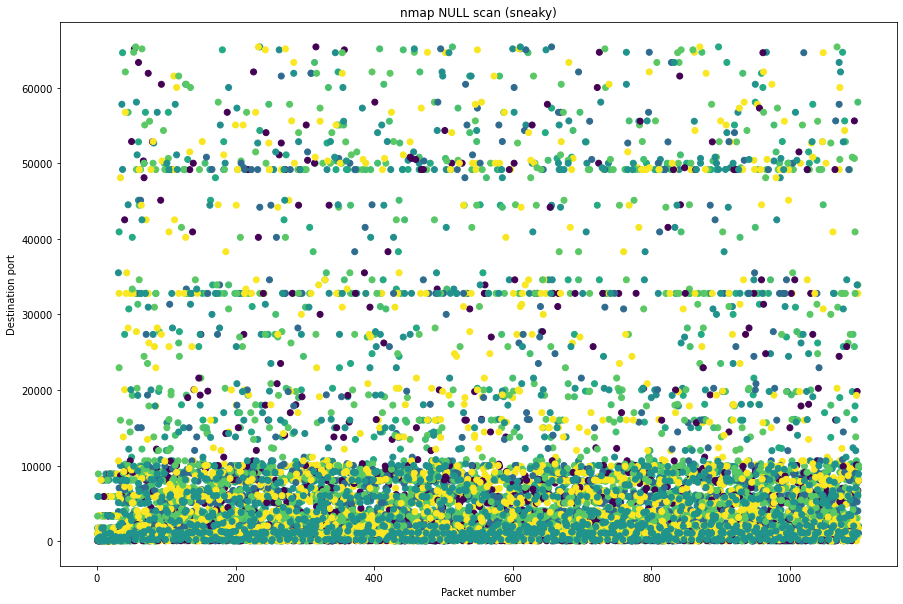

In [15]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [16]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [17]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

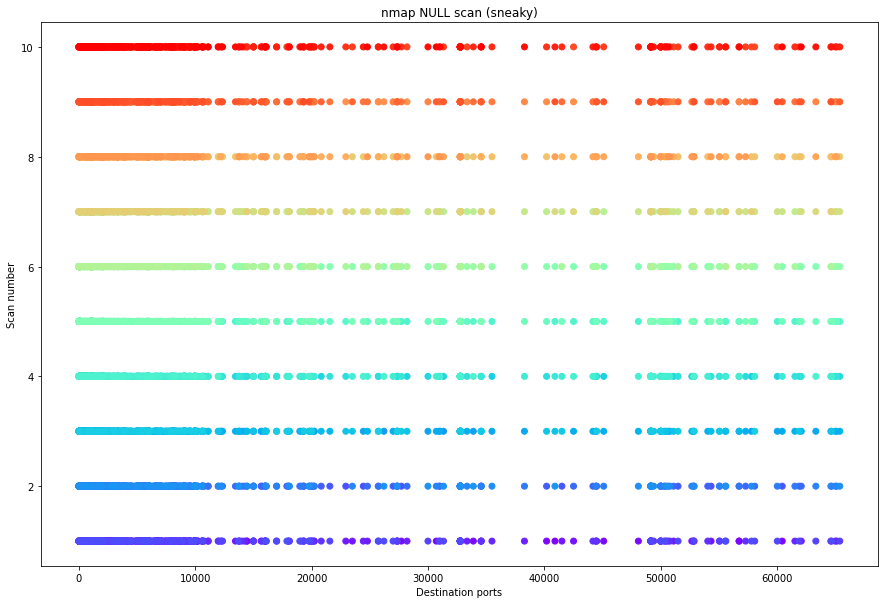

In [18]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [19]:
payloads.value_counts()

0.0    10990
dtype: int64

## IP-ID

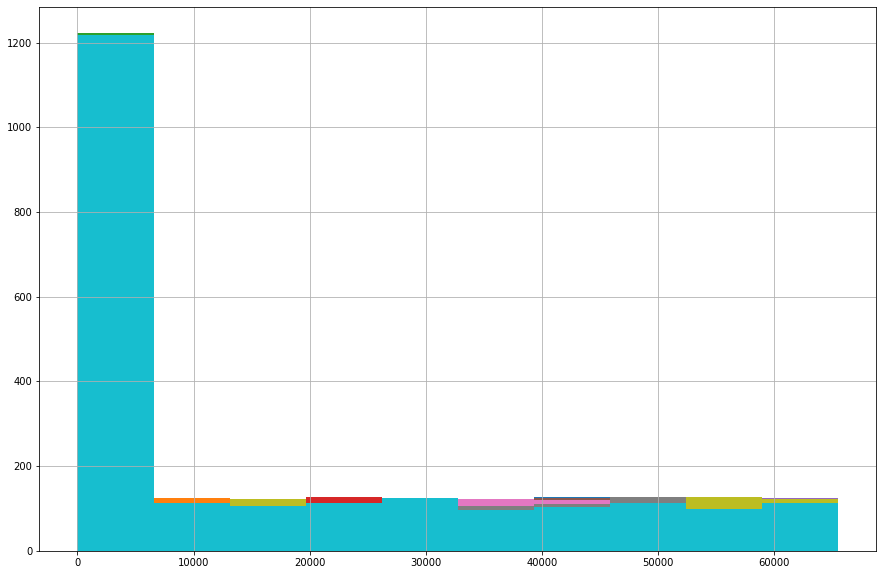

In [20]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

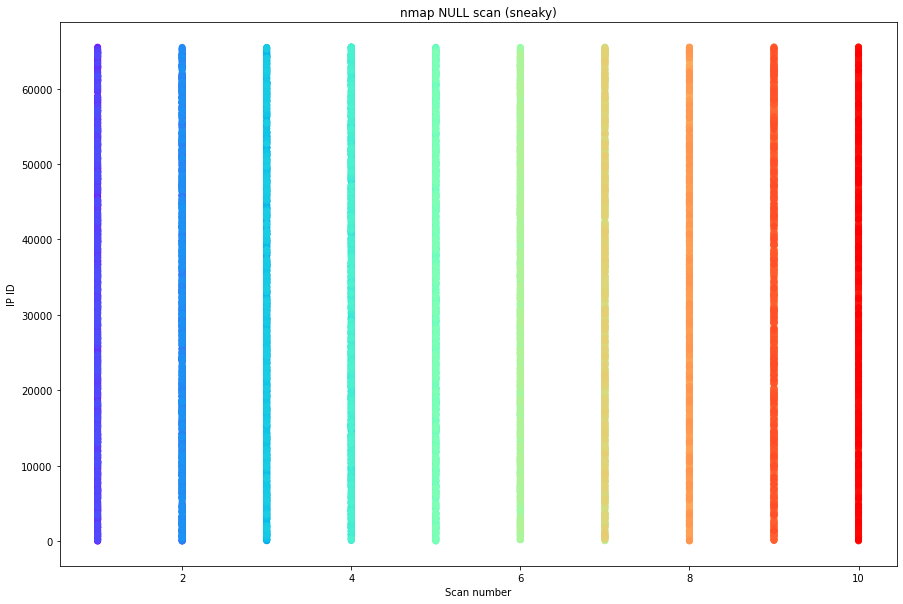

In [21]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


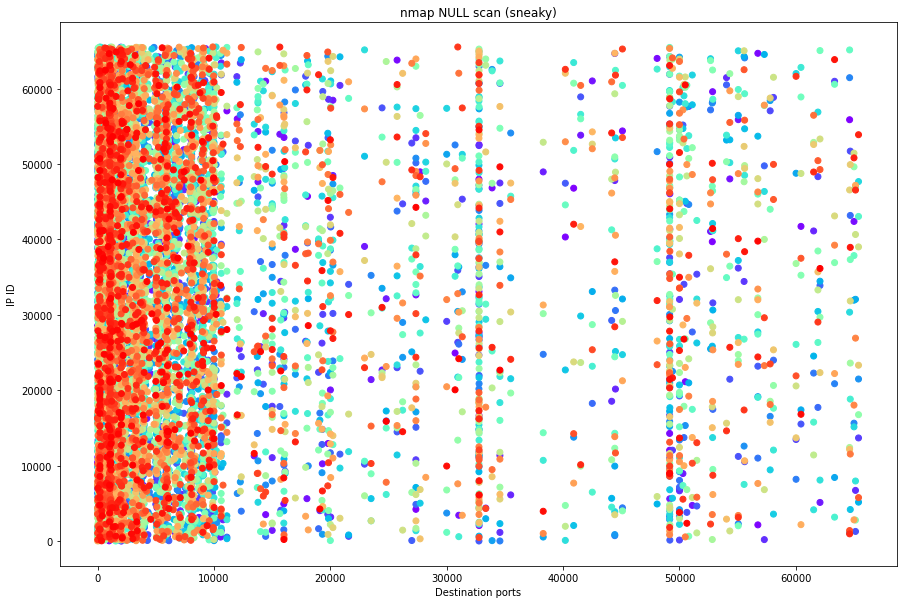

In [22]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])


if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

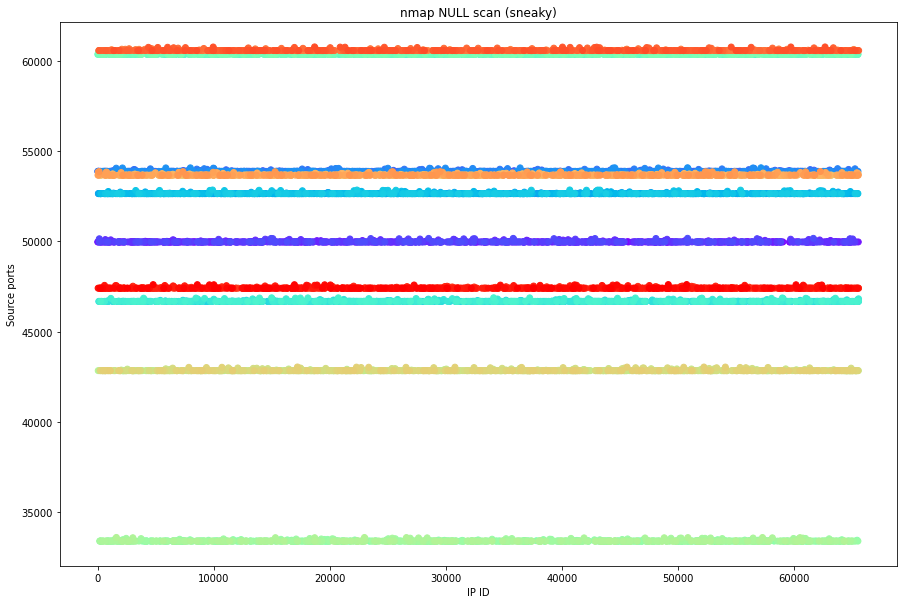

In [23]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [24]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

## TCP Window size

In [25]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
-----
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Wind

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
-----
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Wind

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [26]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368300697
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368431771
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 3368562837
Sequence number: 3368104092
Sequence number: 3368104092
Sequence number: 336

Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2856974227
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2857105297
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2857236375
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 2865297170
Sequence number: 286

Sequence number: 93257631
Sequence number: 97910724
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 97779650
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 97648576
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 99614718
Sequence number: 93257631
Sequence number: 93257631
Sequence number: 93257631
Sequence num

Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4093323779
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4093192705
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4093061647
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 4083034790
Sequence number: 408

Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4022442738
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4022573808
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4023229182
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 4024736471
Sequence number: 402

Sequence number: 3080578530
Sequence number: 3080578530
Sequence number: 3080578530
Sequence number: 3080578530
Sequence number: 3080578530
Sequence number: 3080578530
Sequence number: 3080578530
Sequence number: 3075794219
Sequence number: 3080578530
Sequence number: 3080578530
Sequence number: 3080578530
Sequence number: 3080578530
Sequence number: 3080578530
Sequence number: 3080578530
Sequence number: 3080578530
Sequence number: 3080578530
Sequence number: 3080578530
Sequence number: 3080578530
-----
Sequence number: 3888362413
Sequence number: 3888362413
Sequence number: 3888362413
Sequence number: 3888362413
Sequence number: 3888362413
Sequence number: 3888362413
Sequence number: 3888362413
Sequence number: 3888362413
Sequence number: 3888362413
Sequence number: 3888362413
Sequence number: 3888559016
Sequence number: 3888362413
Sequence number: 3888362413
Sequence number: 3888362413
Sequence number: 3888362413
Sequence number: 3888362413
Sequence number: 3888362413
Sequence numbe

Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2621285003
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2621416073
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 2620498567
Sequence number: 2627248686
Sequence number: 2627248686
Sequence number: 262

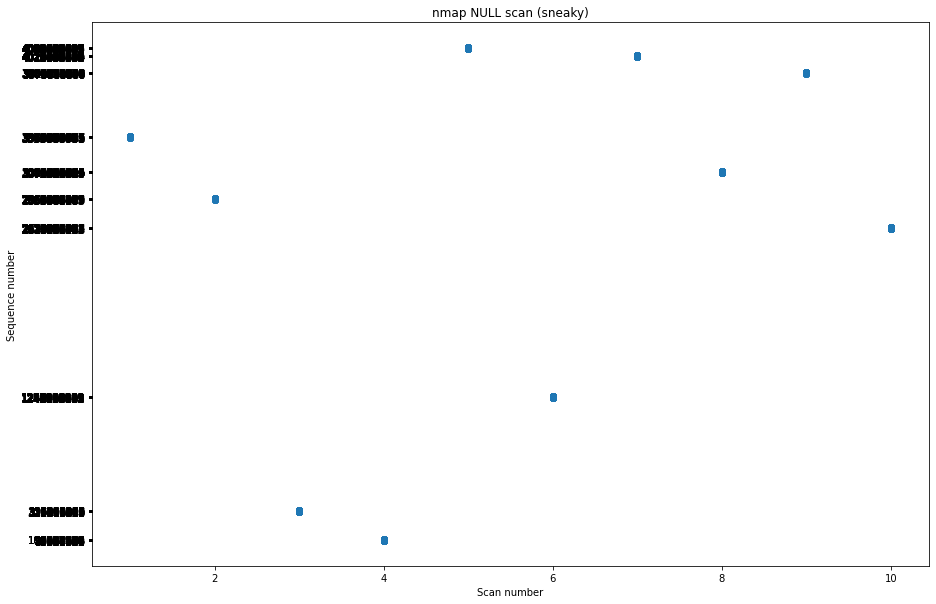

In [27]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


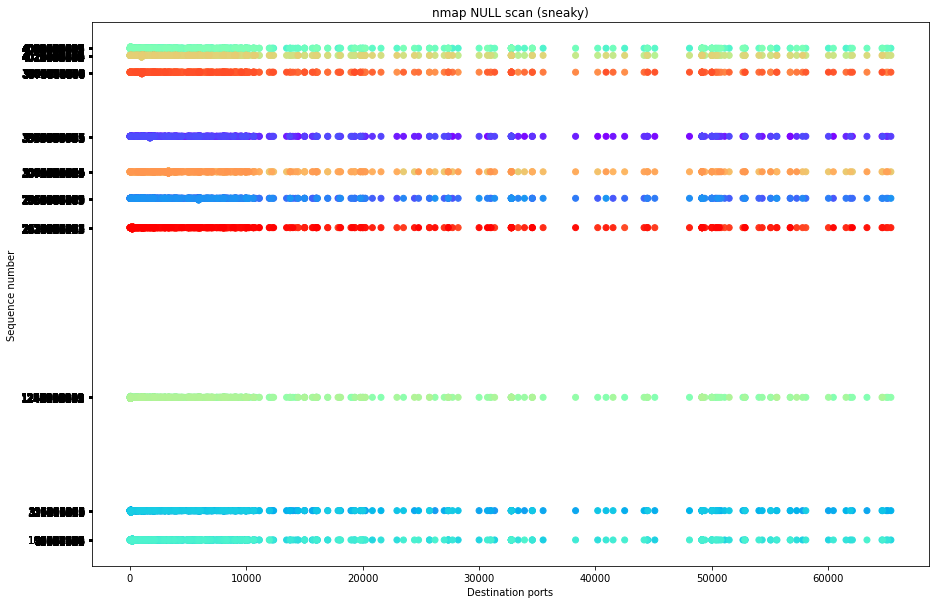

In [28]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

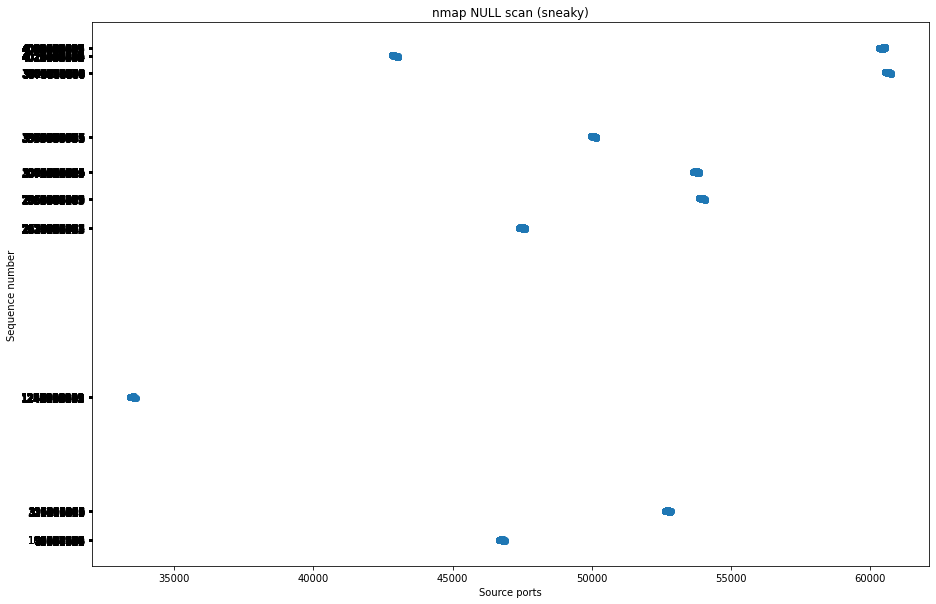

In [29]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [30]:
len(set(orders_port['sport']))

1000

In [31]:
orders_port['sport'].value_counts()[:30]

49961    1000
53865    1000
47403    1000
60551    1000
53655    1000
42841    1000
60341    1000
46671    1000
52636    1000
33410    1000
49984       1
42964       1
42968       1
42970       1
42972       1
42974       1
42976       1
42978       1
42980       1
42982       1
42984       1
42986       1
42988       1
42990       1
42992       1
42994       1
42996       1
42998       1
43000       1
43002       1
Name: sport, dtype: int64

## Flags

In [32]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
-----
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flag

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan